<a href="https://colab.research.google.com/github/g-e-mm/COVID19RecogniserCNN/blob/main/Covid_19_Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> COVID 19 Recognizer using CNN

Approach to the Problem:
1. Load Libraries and Images
2. Visualise the images
3. Declare a Sequential Model
4. Declare Layers
  1. Convolution Layers
    * Filters, stride and shape
  2. Pooling Layers
    * Max/Avg, Stride and Shape
  3. Flatten
  4. Dense Layer
    * Number of Neurons, Activation
  5. Output Layer
    * Activation and Output Shape
5. Compile the model
  * Optimizer, Loss, Metrics
6. Fit the model
  * Dataset, Epochs, Batch Size
7. Model Evaluation

# Load Libraries and Images

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip '/content/drive/MyDrive/IMARTICUS/COVID 19 Project/archive (1).zip'

Archive:  /content/drive/MyDrive/IMARTICUS/COVID 19 Project/archive (1).zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Cov

In [4]:
train_dir = "/content/Covid19-dataset/train"  # Updated path
val_dir = "/content/Covid19-dataset/test"  # Updated path

train_dataset = image_dataset_from_directory(train_dir, image_size=(160, 160),
                                             class_names=['Covid', 'Normal', 'Viral Pneumonia'], batch_size=64, seed=123)
val_dataset = image_dataset_from_directory(val_dir, image_size=(160, 160),
                                           class_names=['Covid', 'Normal', 'Viral Pneumonia'], batch_size=64, seed=123)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [5]:
train_dataset.class_names
val_dataset.class_names

['Covid', 'Normal', 'Viral Pneumonia']

Now, we have unzipped the file, put the images into a directory that will access it when called for!

# Visualisation

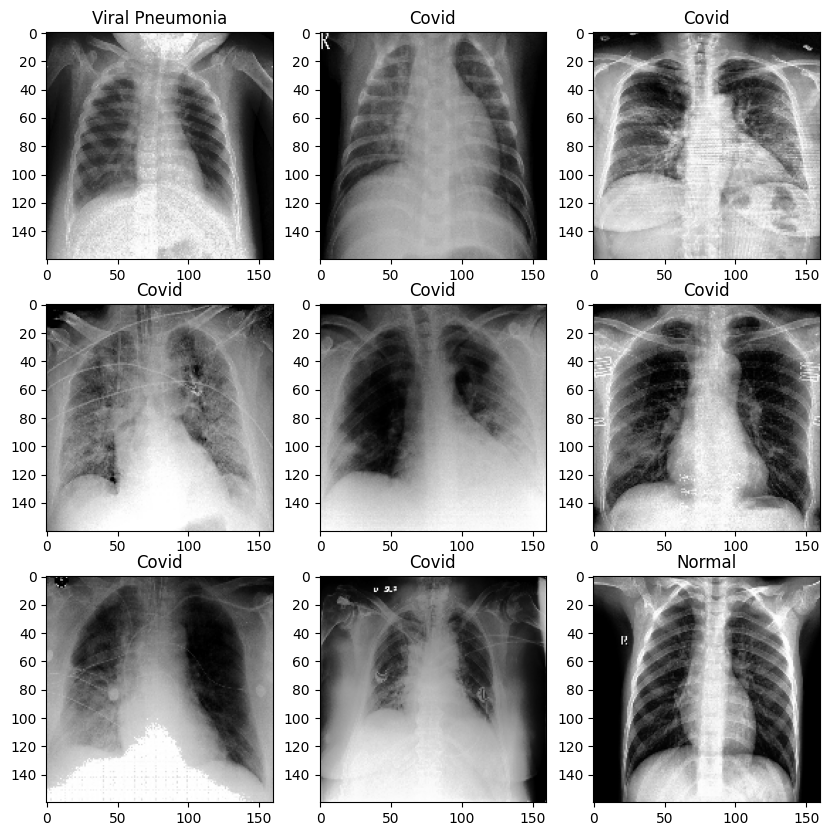

In [6]:
clas_names = train_dataset.class_names

plt.figure(figsize = (10,10))
for images , labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(clas_names[labels[i]])

#Declaring a Sequential Model and Layers

In [7]:
model = Sequential()

### Feature Extraction Layer ###
## Block 1 ##
model.add(Conv2D(128 , (3,3) , padding = 'same' , activation = 'relu' , input_shape = (160,160,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

## Block 2 ##
model.add(Conv2D(256 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

## Block 3 ##
model.add(Conv2D(512 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

## Block 4 ##
model.add(Conv2D(1024 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

### Classification Layer ###
model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3 , activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 160, 160, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 80, 80, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 80, 80, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 40, 40, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 40, 40, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      13,107,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,306,243 (73.65 MB)

 Trainable params: 19,306,243 (73.65 MB)

 Non-trainable params: 0 (0.00 B)

# Compile and Fit the Model

In [9]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
hist = model.fit(train_dataset , epochs = 50 , validation_data = val_dataset , batch_size = 32)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 14s/step - accuracy: 0.4103 - loss: 629.9966 - val_accuracy: 0.3939 - val_loss: 53.6334
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3964 - loss: 31.0857 - val_accuracy: 0.3939 - val_loss: 1.2975
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 971ms/step - accuracy: 0.3234 - loss: 1.6455 - val_accuracy: 0.3939 - val_loss: 1.1594
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4489 - loss: 1.1971 - val_accuracy: 0.3030 - val_loss: 1.3567
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 926ms/step - accuracy: 0.4806 - loss: 1.0576 - val_accuracy: 0.6515 - val_loss: 0.8648
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 996ms/step - accuracy: 0.6777 - loss: 0.8061 - val_accuracy: 0.7121 - val_loss: 0.6883
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8105 - loss: 0.5702 - val_accuracy: 0.6515 - val_loss: 0.7027
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7840 - loss: 0.4931 - val_accuracy: 0.7576 - val_loss: 0.5669


# Model Evaluation

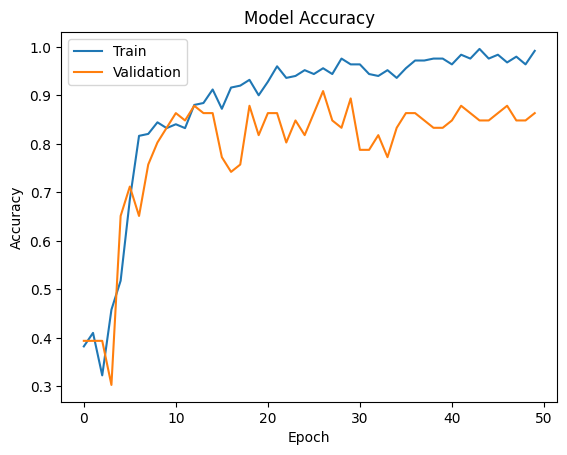

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

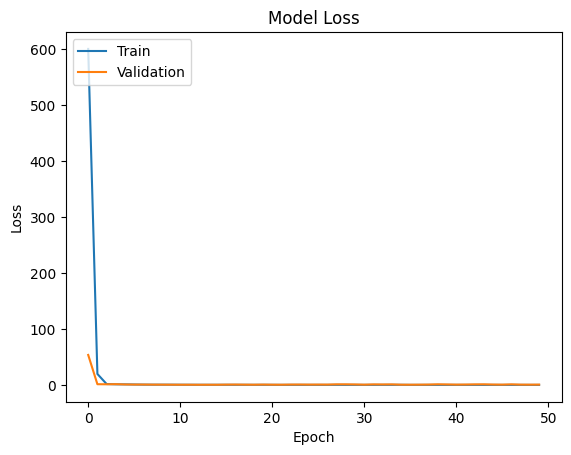

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

now, we plot a confusion matrix

In [13]:
y_hat_train = model.predict(train_dataset)
y_hat_test = model.predict(val_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step


In [14]:
y_true_train = np.array([label.numpy() for _, labels in train_dataset for label in labels])

In [15]:
y_true_val = np.array([label.numpy() for _, labels in val_dataset for label in labels])

In [36]:
def model_eval(y_true, y_pred):
  print("Accuracy Score: ",accuracy_score(y_true, y_pred))
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=train_dataset.class_names,
              yticklabels=train_dataset.class_names)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()
  print(classification_report(y_true, y_pred, target_names=train_dataset.class_names))

In [38]:
print("Shape of y_true_train:", y_true_train.shape)
print("Shape of y_hat_train.round():", y_hat_train.round().shape)

Shape of y_true_train: (251,)
Shape of y_hat_train.round(): (251, 3)


In [39]:
y_pred_train = np.argmax(y_hat_train, axis=1)
print("Shape of y_pred_train:", y_pred_train.shape)

Shape of y_pred_train: (251,)


Accuracy Score:  0.350597609561753


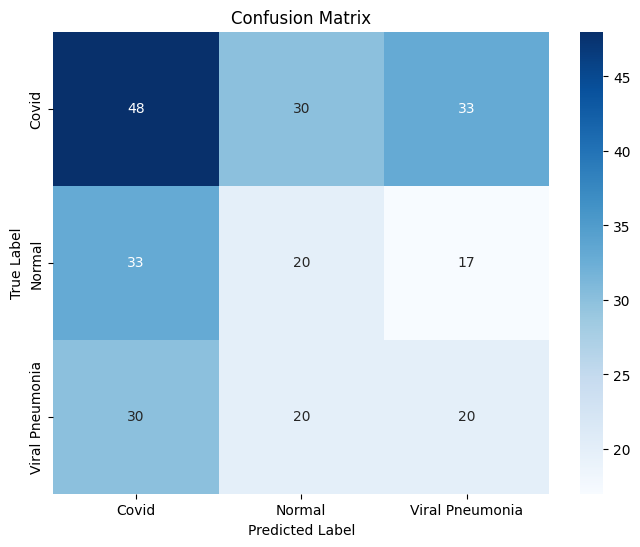

                 precision    recall  f1-score   support

          Covid       0.43      0.43      0.43       111
         Normal       0.29      0.29      0.29        70
Viral Pneumonia       0.29      0.29      0.29        70

       accuracy                           0.35       251
      macro avg       0.33      0.33      0.33       251
   weighted avg       0.35      0.35      0.35       251



In [42]:
model_eval(y_true_train, y_pred_train)